<a href="https://colab.research.google.com/github/Koushik-SCC/Mathematical/blob/main/Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Euler's method for 1st order ODE
def Eu1d(f,t0,x,dt,T):
    #t is the independent variable
    #t0 and x are initial values, dt is step size, T is the last data point
    tt = []
    xx = []
    for i in np.arange(t0,t+dt,dt):
        tt.append(i)
        xx.append(x)
        x += dt*f(i,x)
    return tt,xx

In [2]:
#Euler's method for 2nd order ODE
def Eu2d(f1,f2,t0,x,y,dt,T):
    #t0,x,y are initial values
    tt,xx,yy = [],[],[]
    for i in np.arange(t0,t+dt,dt):
        tt.append(i)
        xx.append(x)
        yy.append(y)
        x += dt*f(i,x,y)
        y += dt*g(i,x,y)
    return tt,xx,yy

RK4 for $2^{nd}$ Order ODE

In [3]:
# RK4 for two coupled ODEs
def RK4_2d(f1,f2,t0,x,y,dt,T):
  # here t0,x,y are initial conditions
  # dt is step-size and T is the last limit of the independent variable(here t)
  tt,xx,yy = [],[],[]
  for i in np.arange(t0,T+dt,dt):
    tt.append(i)
    xx.append(x)
    yy.append(y)
    
    K1 = dt*f1(i,x,y)
    L1 = dt*f2(i,x,y)
    
    K2 = dt*f1(i+dt/2,x+K1/2,y+L1/2)
    L2 = dt*f2(i+dt/2,x+K1/2,y+L1/2)
    
    K3 = dt*f1(i+dt/2,x+K2/2,y+L2/2)
    L3 = dt*f2(i+dt/2,x+K2/2,y+L2/2)
    
    K4 = dt*f1(i+dt,x+K3,y+L3)
    L4 = dt*f2(i+dt,x+K3,y+L3)
    
    x += (K1+2*K2+2*K3+K4)/6
    y += (L1+2*L2+2*L3+L4)/6
  return tt,xx,yy

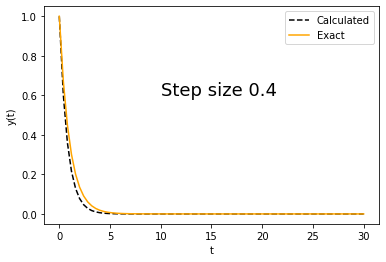

In [4]:
# dy/dt = -Ky ,y(0) = 1
# the analytical sol. is y = e^(-Kt)
#by Euler's Method 
import numpy as np
import matplotlib.pyplot as plt
#Initial Conditions and parameter
K = 1
t0 = 0
y0 = 1
#step
h = 0.4
t = 30  #the x_coordinate in which we want the y value
def f(t,y):
    a = -K*y
    return a
T,Y = Eu1d(f,t0,y0,h,t)
EXP = []
for i in T:
    EXP.append(np.exp(-K*i))
# plotting
plt.plot(T,Y,'--k',label='Calculated')
plt.plot(T,EXP,c='orange',label='Exact')
plt.ylabel('y(t)')
plt.xlabel('t')
plt.legend()
plt.text(10,0.6,'Step size 0.4',size = 18)
plt.show()

###Lotka-Volterra Model:
$$ \frac{dx}{dt}= \alpha x - \beta xy  $$
$$ \frac{dy}{dt}= -\gamma y + \delta xy $$

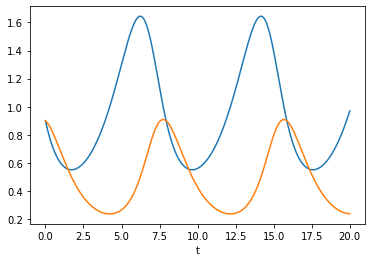

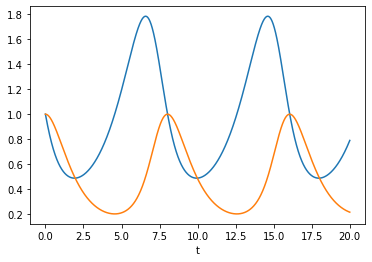

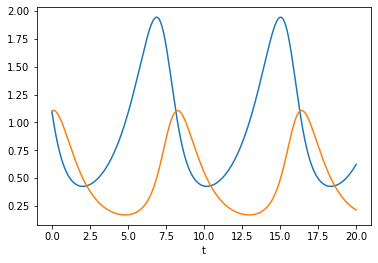

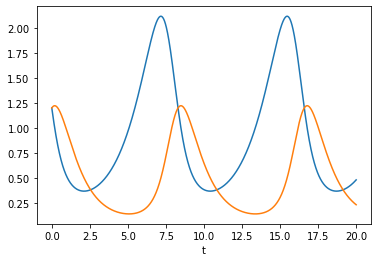

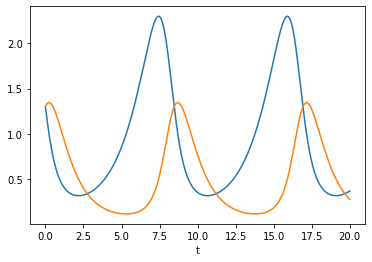

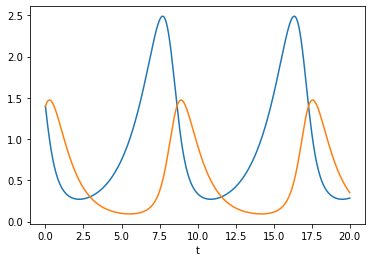

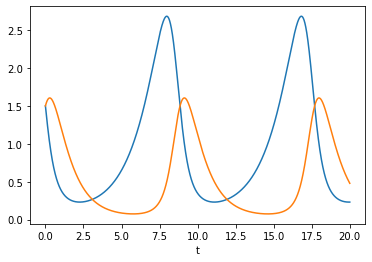

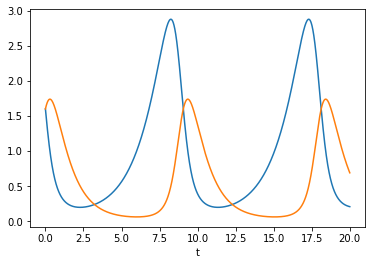

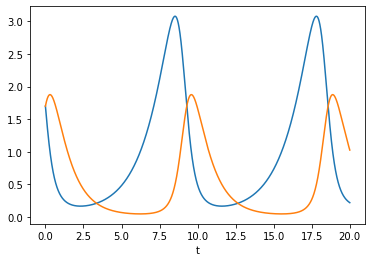

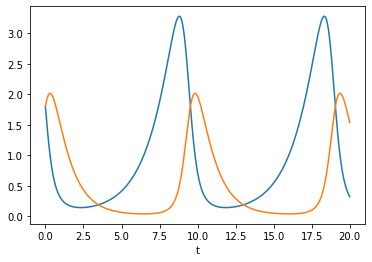

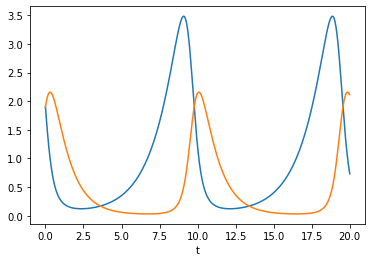

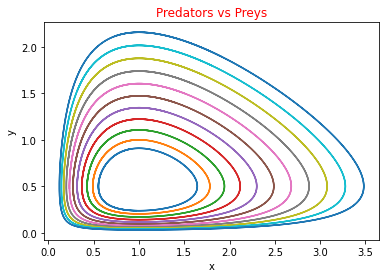

In [5]:
# LOTKA-VOLTERRA MODEL:

alpha,beta,gamma,delta = (2/3),(4/3),1,1
cons = [alpha,-beta,gamma,delta]
def f1(t,x,y):
  return cons[0]*x+cons[1]*x*y
def f2(t,x,y):
  return -cons[2]*y+cons[3]*x*y

T,dt = 20,0.001
A = 0.9 # increses by 0.1 i.e(0.9,1.0,1.1,1.2,1.3,...,2)
while A <=2:
  x=y=A    #initial conditions 
  t0 = 0
  tt,xx,yy = RK4_2d(f1,f2,t0,x,y,dt,T)
  plt.plot(tt,xx)
  plt.plot(tt,yy)
  A += 0.1
  plt.xlabel('t')
  plt.show()
  plt.clf()
# plotting the x vs v graph
T,dt = 20,0.001
A = 0.9 # increses by 0.1 i.e(0.9,1.0,1.1,1.2,1.3,...,2)
while A <=2:
  x=y=A    #initial conditions 
  t0 = 0
  tt,xx,yy = RK4_2d(f1,f2,t0,x,y,dt,T)
  plt.plot(xx,yy)
  A += 0.1
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title("Predators vs Preys",c='red')
plt.show()

LOTKA-VOLTERRA MODEL without using the RK4 func.

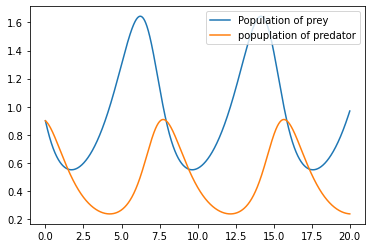

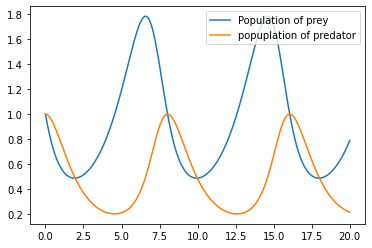

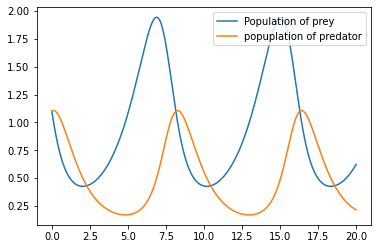

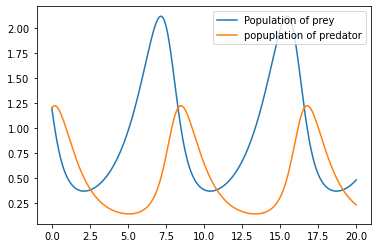

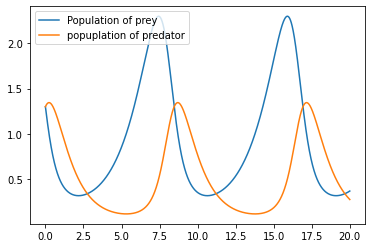

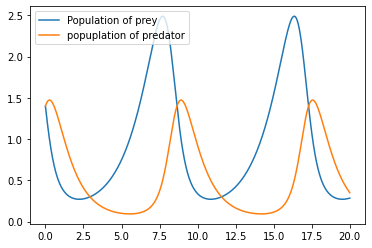

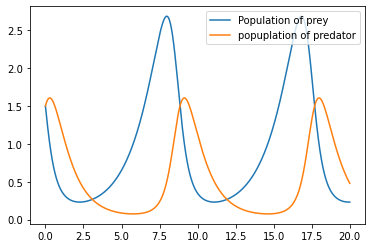

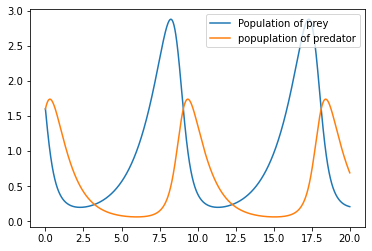

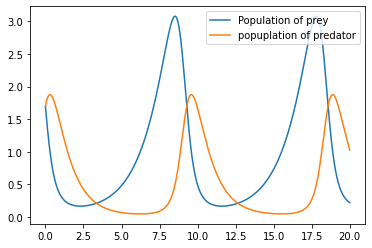

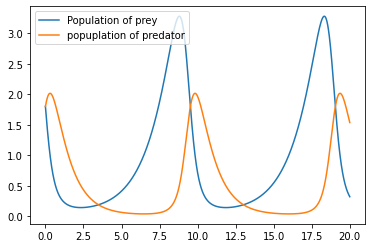

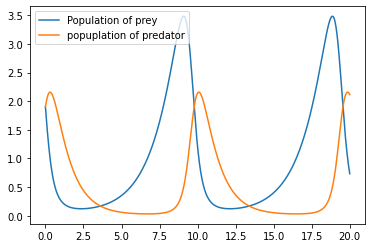

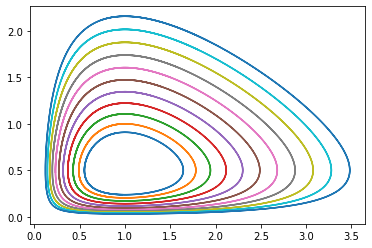

In [6]:
# LOTKA-VOLTERRA MODEL:

alpha,beta,gamma,delta = (2/3),(4/3),1,1
cons = [alpha,-beta,gamma,delta]
def f1(t,x,y):
  return cons[0]*x+cons[1]*x*y
def f2(t,x,y):
  return -cons[2]*y+cons[3]*x*y

t,dt = 20,0.001
A = 0.9 # increses by 0.1 i.e(0.9,1.0,1.1,1.2,1.3,...,2)
while A <=2:
  x=y=A    #initial conditions 
  t0 = 0
  tt,xx,yy=[],[],[]
  for i in np.arange(t0,t+dt,dt):
    tt.append(i)
    xx.append(x)
    yy.append(y)
    
    K1 = dt*f1(i,x,y)
    L1 = dt*f2(i,x,y)
    
    K2 = dt*f1(i+dt/2,x+K1/2,y+L1/2)
    L2 = dt*f2(i+dt/2,x+K1/2,y+L1/2)
    
    K3 = dt*f1(i+dt/2,x+K2/2,y+L2/2)
    L3 = dt*f2(i+dt/2,x+K2/2,y+L2/2)
    
    K4 = dt*f1(i+dt,x+K3,y+L3)
    L4 = dt*f2(i+dt,x+K3,y+L3)
    
    x += (K1+2*K2+2*K3+K4)/6
    y += (L1+2*L2+2*L3+L4)/6
  plt.plot(tt,xx,label='Population of prey')
  plt.plot(tt,yy,label='popuplation of predator')
  A += 0.1
  plt.legend(loc='best',prop={'size':10})
  plt.show()
  plt.clf()
# for plotting the x vs y graph
t,dt = 20,0.001
A = 0.9 # increses by 0.1 i.e(0.9,1.0,1.1,1.2,1.3,...,2)
while A <=2:
  x=y=A    #initial conditions 
  t0 = 0
  tt,xx,yy=[],[],[]
  for i in np.arange(t0,t+dt,dt):
    tt.append(i)
    xx.append(x)
    yy.append(y)
    
    K1 = dt*f1(i,x,y)
    L1 = dt*f2(i,x,y)
    
    K2 = dt*f1(i+dt/2,x+K1/2,y+L1/2)
    L2 = dt*f2(i+dt/2,x+K1/2,y+L1/2)
    
    K3 = dt*f1(i+dt/2,x+K2/2,y+L2/2)
    L3 = dt*f2(i+dt/2,x+K2/2,y+L2/2)
    
    K4 = dt*f1(i+dt,x+K3,y+L3)
    L4 = dt*f2(i+dt,x+K3,y+L3)
    
    x += (K1+2*K2+2*K3+K4)/6
    y += (L1+2*L2+2*L3+L4)/6
  plt.plot(xx,yy)
  A += 0.1
plt.show()

###FORCED VIBRATION: 
An undamped simple harmonic oscillator that is subjected to a sinusoidal driving force, leading to the equation of motion
$$ m\frac{d^2x}{dt^2}+m{\omega_0}^2x=F_0sin(\omega t) .$$
let, $ \frac{dx}{dt}=v=f_1(t,x,v) $ and $ \frac{dv}{dt}= \frac{F_0sin(\omega t)-m{\omega_0}^2x}{m} =f_2(t,x,v) $

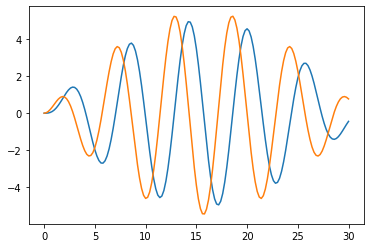

In [7]:

F0 = m = 1
w0 = 1
w = 1.2
def f1(t,x,v):
  return v
def f2(t,x,v):
  return (F0*np.sin(w*t)-m*w0**2*x)/m
t0,T,dt = 0,30,0.1
x=0
v=0
tt,xx,yy=RK4_2d(f1,f2,t0,x,v,dt,T)
plt.plot(tt[::2],xx[::2])
plt.plot(tt[::2],yy[::2])

### RK2

The ODE id $ \frac{dy}{dt} = -k_1y $\
y(0) = 1.0\
Exact Solution is $ y=e^{-k_1t} $

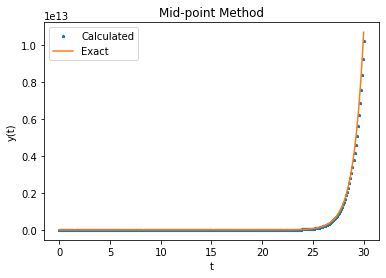

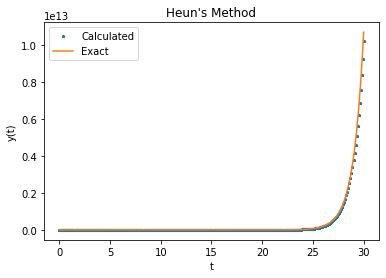

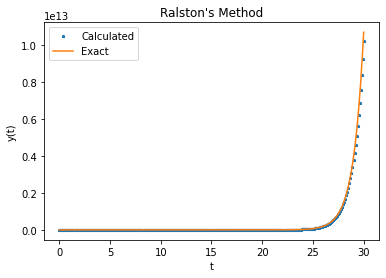

In [8]:
# Runge-Kutta 2nd Order method

#initial condition and step
t0,y0,dt = 0,1,0.1
k1 = -1
def f(y,t):
    return -k1*y
t = 30 # the last coordinate at which we take the sol.
y = y0
# (i). Mid-point Method
T = []  # the T list will remain the same for all methods as the step size is same for all methods
Y1 = []
w1,w2 = 0,1
for i in np.arange(t0,t+dt,dt):
    T.append(i)
    Y1.append(y)
    S1 = f(y,t)
    S2 = f(y+(dt/2)*S1,i+dt/2)
    S = w1*S1 + w2*S2
    y += dt*S
sol = [] # to store the exact solution
for i in T:
    b = np.exp(-k1*i)
    sol.append(b)
plt.figure(1)
plt.plot(T,Y1,'*',label='Calculated',ms=3)
plt.plot(T,sol,label='Exact')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Mid-point Method')
plt.legend()
plt.show()

# (ii). Heun's Method
Y2 = []
y = y0 #initial value of y
w1,w2 = 0.5,0.5
for i in np.arange(t0,t+dt,dt):
    Y2.append(y) # no need to store data for t as the T list will remain the same for all methods as the step size is same for all methods
    S1 = f(y,t)
    S2 = f(y+dt*S1,i+dt)
    S = w1*S1 + w2*S2
    y += dt*S
plt.figure(2)
plt.plot(T,Y2,'*',label='Calculated',ms=3)
plt.plot(T,sol,label='Exact')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Heun's Method")
plt.legend()
plt.show()

# (iii). Ralston's Method
Y3 = []
y = y0 #initial value of y
w1,w2 = 1/3,2/3
for i in np.arange(t0,t+dt,dt):
    Y3.append(y)
    S1 = f(y,t)
    S2 = f(y+(3/4)*dt*S1,i+(3/4)*dt)
    S = w1*S1 + w2*S2
    y += dt*S
plt.figure(3)
plt.plot(T,Y3,'*',label='Calculated',ms=3)
plt.plot(T,sol,label='Exact')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("Ralston's Method")
plt.legend()
plt.show()

Spring-Mass system\
The ODE is $ m\frac{d^2x}{dt^2}+kx=0 $\
$ x(t=0)=x_0 $ and $ \frac{dx}{dt}(t=0)=0 $\
The analytical solution is $ x(t)=x_0cos(\sqrt{\frac{k}{m}}t) $ 

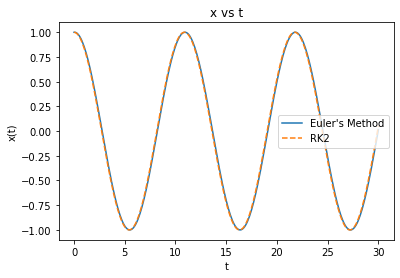

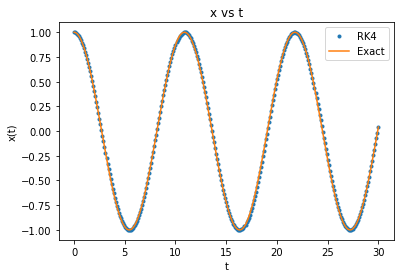

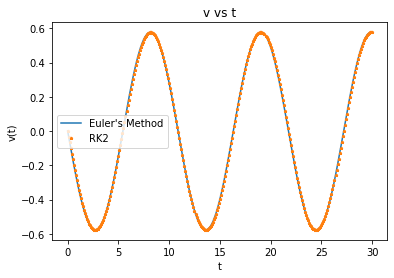

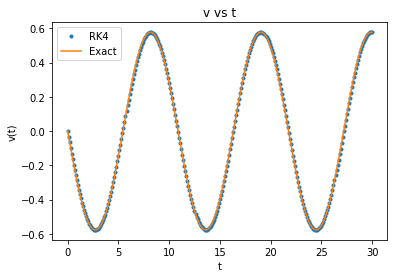

In [9]:
#let
m = 3
k = 1

# (i). Euler's Method
#Initial Conditions and increment in t (dt)
t0,x0,y0,dt = 0,1,0,0.1
t = 30  #the x_coordinate in which we want the y value

def f(t,x,y): return y
def g(t,x,y):
    return -k*x/m
T,X1,Y1 = Eu2d(f,g,t0,x0,y0,dt,t)
Exact_x, Exact_xdot = [],[]
for i in T:
    Exact_x.append(np.cos(np.sqrt(k/m)*i))
    Exact_xdot.append(-np.sqrt(k/m)*(np.sin(np.sqrt(k/m)*i)))

'''
# (ii). Scipy pakage
from scipy.integrate import odeint
def F(u,t):
    xx,yy = u     #unpacking u
    ff = yy
    gg = -k*xx/m
    return [ff,gg]  # returns two functions in pack
u0 = [1,0]  #initial values : x0,y0 = 1,0
t = np.linspace(0,30,300) # Have to defune t again as the odeint func. takes an array as argument
Sol = odeint(F,u0,t)
xx = Sol[:,0].reshape(1,300)  #First Column . reshaping like t
yy = Sol[:,1].reshape(1,300) #Second Column . reshaping like t
'''
# (iii). RK2 Method(Mid-point Method)
t = 30  # Have to define t again because I have changed t in the previous method (scipy pakage)
X2,Y2 = [],[]
x = x0
y = y0
w1,w2 = 0,1
for i in np.arange(t0,t+dt,dt):
    X2.append(x)
    Y2.append(y)
    S1 = f(t,x,y)
    M1 = g(t,x,y)
    
    S2 = f(i+dt/2,x+(dt/2)*S1,y+(dt/2)*M1)
    M2 = g(i+dt/2,x+(dt/2)*S1,y+(dt/2)*M1)
    
    S = w1*S1 + w2*S2
    M = w1*M1 + w2*M2
    x += dt*S
    y += dt*M
#plt.plot(T,X2)

# (iv) RK4
T,X3,Y3 = RK4_2d(f,g,t0,x0,y0,dt,t)

# plotting
plt.figure(1)
plt.plot(T,X1,label="Euler's Method")
#plt.plot(t,xx,linestyle='--',label='odeint')
plt.plot(T,X2,'--',label="RK2",ms=2)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x vs t')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(T,X3,'o',label="RK4",ms=3)
plt.plot(T,Exact_x,label="Exact")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x vs t')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(T,Y1,label="Euler's Method")
#plt.plot(t,xx,linestyle='--',label='odeint')
plt.plot(T,Y2,'*',label="RK2",ms=3)
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('v vs t')
plt.legend()
plt.show()

plt.figure(4)
plt.plot(T,Y3,'o',label="RK4",ms=3)
plt.plot(T,Exact_xdot,label="Exact")
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('v vs t')
plt.legend()
plt.show()

The Damped Harmonic Oscillator

---

The ODE is : $ \frac{d^2y}{dx^2}+\lambda\frac{dy}{dx}+ky = 0 $

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000

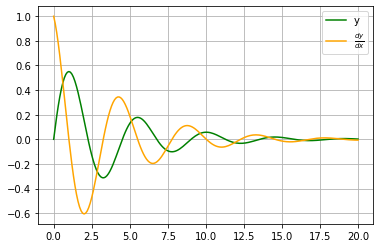

In [10]:
#Initial values
x0,y0,z0 = 0,0,1
#Increment in x 
h = 0.1
lam,k = 0.5,2
def f(x,y,z): return z
def g(x,y,z):
  return -lam*z-k*y
y = y0
z = z0
x = 20
X,Y,Z = RK4_2d(f,g,x0,y0,z0,h,x)
print(X)
print(Y)
print(Z)
#for plotting
import matplotlib.pyplot as plt
plt.plot(X,Y,'g',label='y')
plt.plot(X,Z,'orange',label=r"$ \frac{dy}{dx}$")
plt.grid()
plt.legend()
plt.show()